# High-Frequency Data and *matplotlib* 

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

## Dates and times

In [3]:
import datetime as dt
d=dt.datetime.now()
d

datetime.datetime(2018, 10, 3, 20, 8, 54, 998902)

In [4]:
# individual date fields
d.year, d.month, d.day, d.hour, d.microsecond

(2018, 10, 3, 20, 998902)

In [5]:
# GMT time
dt.datetime.utcnow()

datetime.datetime(2018, 10, 3, 18, 8, 56, 150989)

In [6]:
# Timedelta objects: difference between two times
# format: days, seconds, microseconds
d1=dt.datetime.now()
diff=d1-d
diff

datetime.timedelta(0, 1, 897717)

In [7]:
dt.datetime.strptime('20180701-06:44:59.598514', "%Y%m%d-%H:%M:%S.%f")

datetime.datetime(2018, 7, 1, 6, 44, 59, 598514)

### Datetime and pandas timestamp conversion

from datetime to pandas timestamp:

In [8]:
pd.Timestamp(d)

Timestamp('2018-10-03 20:08:54.998902')

from timestamp to datetime:

In [9]:
date_now_ts = pd.Timestamp(dt.datetime.now())
date_now_ts.to_datetime()

datetime.datetime(2018, 10, 3, 20, 9, 0, 728402)

### Datetime and numpy datetime64 conversion

From datetime to datetime64:

In [10]:
d64 = np.datetime64(d)
d64

numpy.datetime64('2018-10-03T20:08:54.998902')

From datetime64 to datetime:

In [11]:
d64.astype(dt.datetime)

datetime.datetime(2018, 10, 3, 20, 8, 54, 998902)

*Plotting support with datetime64 is limited in matplotlib - it is better to convert the timestamps before!*

## High-frequency data

We are going to work with high-frequency trading data, downloaded from Thomson Reuters Tick History. Concretely, all the trade and quotes from July 2009 on NASDAQ OMX Stockholm for three stocks:
1. H&M (NORDIC_TS_20090712-2009-07-HMb.ST)
2. Nokia (NORDIC_TS_20090712-2009-07-NOKI.ST)
3. Volvo (NORDIC_TS_20090712-2009-07-VOLVb.ST)

> # Please practice now
> - Merge all three stock files into a single DataFrame object.
> - How many observations are there in total?
> - What variables does the dataset contain?

In [12]:
list_stocks=['HMb.ST', 'NOKI.ST', 'VOLVb.ST'] 
fname='NORDIC_TS_20090712-2009-07-'

Data=pd.DataFrame()

for stock in list_stocks:
    Temp=pd.read_csv('data/{}{}.csv'.format(fname,stock)).reset_index()
    Data=Data.append(Temp, ignore_index=True)

In [13]:
Data.columns.tolist()

['index',
 '#RIC',
 'Date[G]',
 'Time[G]',
 'GMT Offset',
 'Type',
 'Ex/Cntrb.ID',
 'Price',
 'Volume',
 'Buyer ID',
 'Bid Price',
 'Bid Size',
 'No. Buyers',
 'Seller ID',
 'Ask Price',
 'Ask Size',
 'No. Sellers',
 'Qualifiers',
 'Exch Time']

In [14]:
Data.count()

index          1237008
#RIC           1237008
Date[G]        1237008
Time[G]        1237008
GMT Offset     1237008
Type           1237008
Ex/Cntrb.ID          0
Price           155672
Volume          155672
Buyer ID        155603
Bid Price        43752
Bid Size        518790
No. Buyers           0
Seller ID       155603
Ask Price        45580
Ask Size        562753
No. Sellers          0
Qualifiers      155672
Exch Time       155672
dtype: int64

In [15]:
Data.head()

,index,#RIC,Date[G],Time[G],GMT Offset,Type,Ex/Cntrb.ID,Price,Volume,Buyer ID,Bid Price,Bid Size,No. Buyers,Seller ID,Ask Price,Ask Size,No. Sellers,Qualifiers,Exch Time
0,0,HMb.ST,20090701,06:44:59.598514,2,Quote,NaN,NaN,NaN,NaN,385.0,3370.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,HMb.ST,20090701,06:44:59.598514,2,Quote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,385.0,3868.0,NaN,NaN,NaN
2,2,HMb.ST,20090701,06:49:43.089521,2,Quote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3888.0,NaN,NaN,NaN
3,3,HMb.ST,20090701,06:50:27.336043,2,Quote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4938.0,NaN,NaN,NaN
4,4,HMb.ST,20090701,06:50:28.333304,2,Quote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4688.0,NaN,NaN,NaN


Variable | Notes
--- | ---
Date[G] | GMT date in format yyyymmdd (int).
Time[G] |  GMT time in format hh : mm : ss.micro (string).
GMT Offset |  Offset from GMT time.
Type | Type of message.
Price |  Transaction price.
Volume |  Transaction volume.
Buyer (Seller) ID |  Trader identificator
Bid (Ask) Price | 
Bid (Ask) Size | Size of bid (ask) order

> # Please practice now
> - What are the types of messages?
> - How many of each type?

In [17]:
Data['Type'].unique()

array(['Quote', 'Trade'], dtype=object)

In [47]:
Data.Type.value_counts()

Quote    1081336
Trade     155672
Name: Type, dtype: int64

## Managing timestamps

> # Please practice now
> - Create a column "DT" with the date and time of the message in the datetime format.
> Hint: use a user defined function.
> - Create a column "TS" with the date and time of the message in the timestamp format.


In [62]:
# Task 2
def mergedate(x):
    return dt.datetime.strptime(x, "%Y%m%d%H:%M:%S.%f") 


Data['DateS'] = Data['Date[G]'].map(str) + Data['Time[G]']
Data['DT'] = Data['DateS'].map(mergedate)
Data['TS'] = Data['DT'].map(pd.Timestamp)

In [63]:
Data.head()

,index,#RIC,Date[G],Time[G],GMT Offset,Type,Ex/Cntrb.ID,Price,Volume,Buyer ID,...,No. Buyers,Seller ID,Ask Price,Ask Size,No. Sellers,Qualifiers,Exch Time,DateS,TS,DT
0,0,HMb.ST,20090701,06:44:59.598514,2,Quote,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009070106:44:59.598514,2009-07-01 06:44:59.598514,2009-07-01 06:44:59.598514
1,1,HMb.ST,20090701,06:44:59.598514,2,Quote,NaN,NaN,NaN,NaN,...,NaN,NaN,385.0,3868.0,NaN,NaN,NaN,2009070106:44:59.598514,2009-07-01 06:44:59.598514,2009-07-01 06:44:59.598514
2,2,HMb.ST,20090701,06:49:43.089521,2,Quote,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3888.0,NaN,NaN,NaN,2009070106:49:43.089521,2009-07-01 06:49:43.089521,2009-07-01 06:49:43.089521
3,3,HMb.ST,20090701,06:50:27.336043,2,Quote,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4938.0,NaN,NaN,NaN,2009070106:50:27.336043,2009-07-01 06:50:27.336043,2009-07-01 06:50:27.336043
4,4,HMb.ST,20090701,06:50:28.333304,2,Quote,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4688.0,NaN,NaN,NaN,2009070106:50:28.333304,2009-07-01 06:50:28.333304,2009-07-01 06:50:28.333304


## Data visualization in *matplotlib*

Text(0.5,1,'NOKIA transaction prices on July 1, 2009')

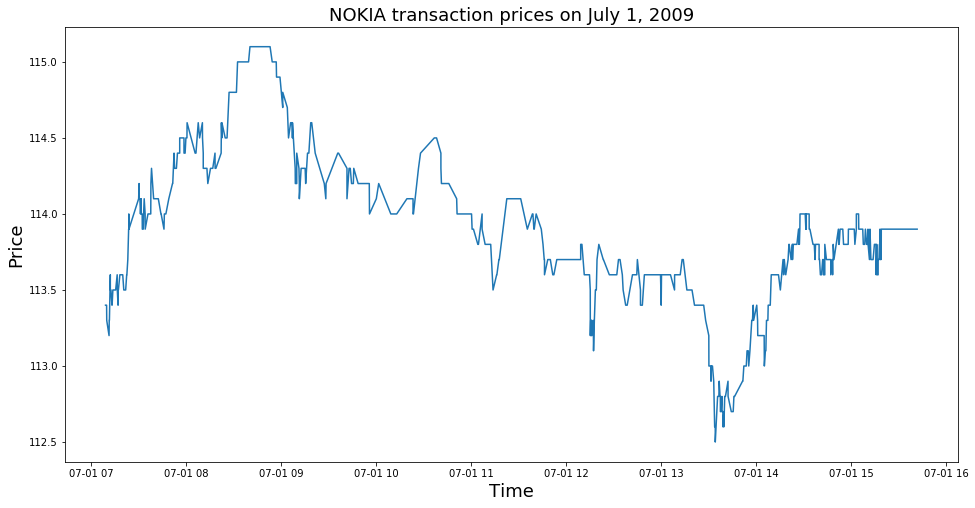

In [12]:
# Task 3
Noki=Data[(Data["#RIC"]=="NOKI.ST") & (Data["Date[G]"]==20090701) & (Data["Type"]=="Trade")]
plt.figure(figsize=(16,8))
plt.plot(Noki["DT"],Noki["Price"]) 
plt.xlabel("Time", fontsize=18) 
plt.ylabel("Price", fontsize=18) 
plt.title("NOKIA transaction prices on July 1, 2009", fontsize=18)

### Task 4: Legends and multiple plots

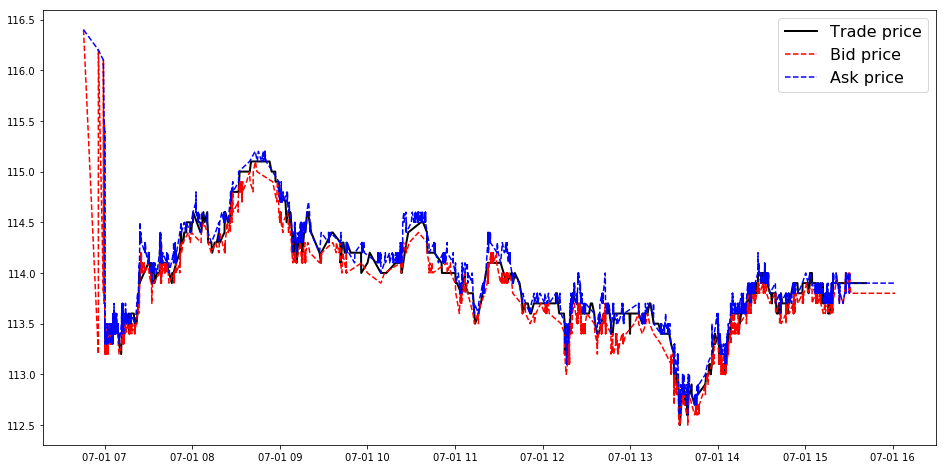

In [13]:
# Task 4
plt.figure(figsize=(16,8))
NokiQ=Data[(Data["#RIC"]=="NOKI.ST") & (Data["Date[G]"]==20090701) & (Data["Type"]=="Quote")]
plt.plot(Noki["DT"],Noki["Price"],label='Trade price',c='k',lw=2) 
plt.plot(NokiQ[NokiQ["Bid Price"]>0]["DT"], NokiQ[NokiQ["Bid Price"]>0]["Bid Price"].dropna(),label='Bid price',c='r',lw=1.5,ls='--')
plt.plot(NokiQ[NokiQ["Ask Price"]>0]["DT"], NokiQ[NokiQ["Ask Price"]>0]["Ask Price"].dropna(), label='Ask price',c='b',lw=1.5,ls='--')
plt.legend(loc='best', fontsize=16)

### Two-axes plot

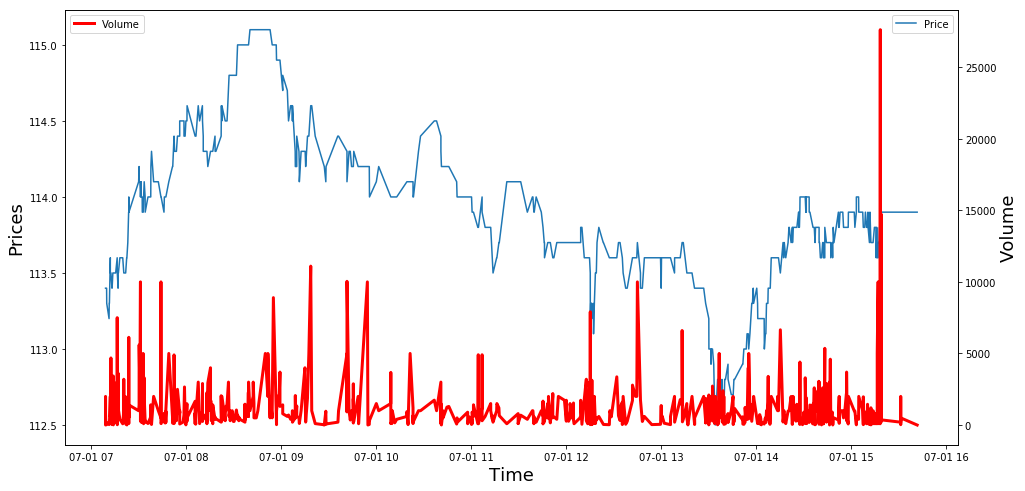

In [14]:
# Two axes plot
fig, ax1=plt.subplots(figsize=(16,8))
plt.plot(Noki["DT"],Noki["Price"], label="Price")
plt.xlabel('Time', fontsize=18)
plt.ylabel('Prices', fontsize=18)

plt.legend(loc='best') 


ax2=ax1.twinx()
plt.plot(Noki["DT"],Noki["Volume"], label="Volume",c='r',lw=3)
plt.ylabel('Volume', fontsize=18)

plt.legend(loc='best') 

### Two subplots

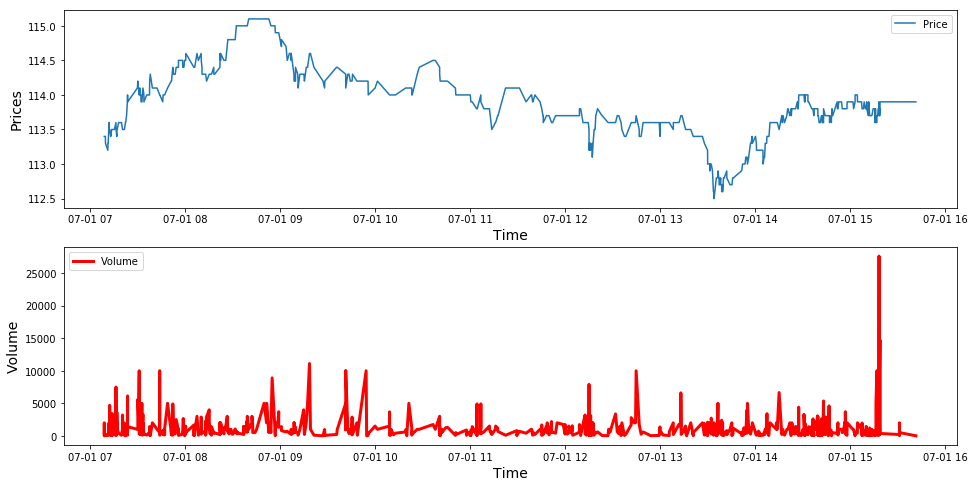

In [15]:
# Two subplots
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.plot(Noki["DT"],Noki["Price"], label="Price")
plt.xlabel('Time', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.legend(loc='best')

plt.subplot(212)
plt.plot(Noki["DT"],Noki["Volume"], label="Volume",c='r',lw=3)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.legend(loc='best') 

### Histogram

(array([  1.,   8.,   0.,  16.,   0.,  19.,   0.,  11.,   0.,  33.,   0.,
          8.,   0.,  29.,   0.,  26.,   0.,  54.,   0.,  68.,   0.,  78.,
          0., 109.,   0.,  94.,  77.,   0.,  77.,   0.,  29.,   0.,  42.,
          0.,  34.,   0.,  32.,   0.,  22.,   0.,  11.,   0.,   3.,   0.,
         11.,   0.,   6.,   0.,  20.,  14.]),
 array([112.5  , 112.552, 112.604, 112.656, 112.708, 112.76 , 112.812,
        112.864, 112.916, 112.968, 113.02 , 113.072, 113.124, 113.176,
        113.228, 113.28 , 113.332, 113.384, 113.436, 113.488, 113.54 ,
        113.592, 113.644, 113.696, 113.748, 113.8  , 113.852, 113.904,
        113.956, 114.008, 114.06 , 114.112, 114.164, 114.216, 114.268,
        114.32 , 114.372, 114.424, 114.476, 114.528, 114.58 , 114.632,
        114.684, 114.736, 114.788, 114.84 , 114.892, 114.944, 114.996,
        115.048, 115.1  ]),
 <a list of 50 Patch objects>)

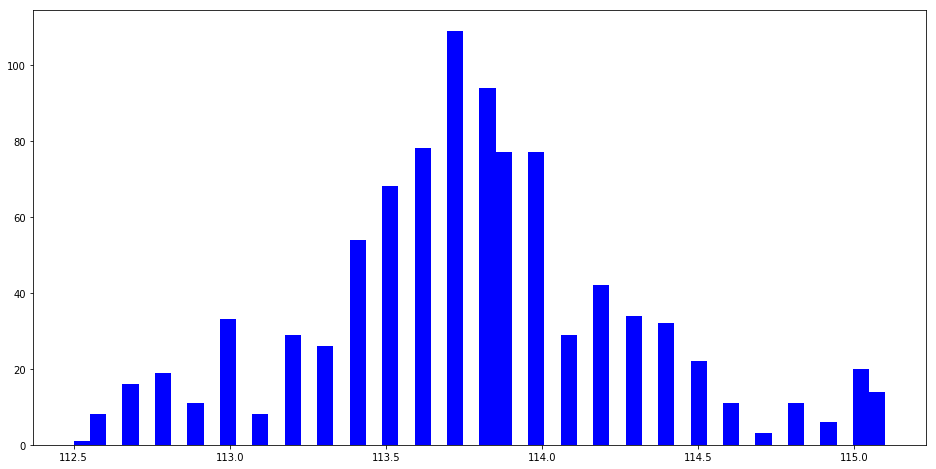

In [16]:
plt.figure(figsize=(16,8))
plt.hist(Noki['Price'].reset_index()['Price'], label='Prices', color='b', bins=50)

### Scatterplot

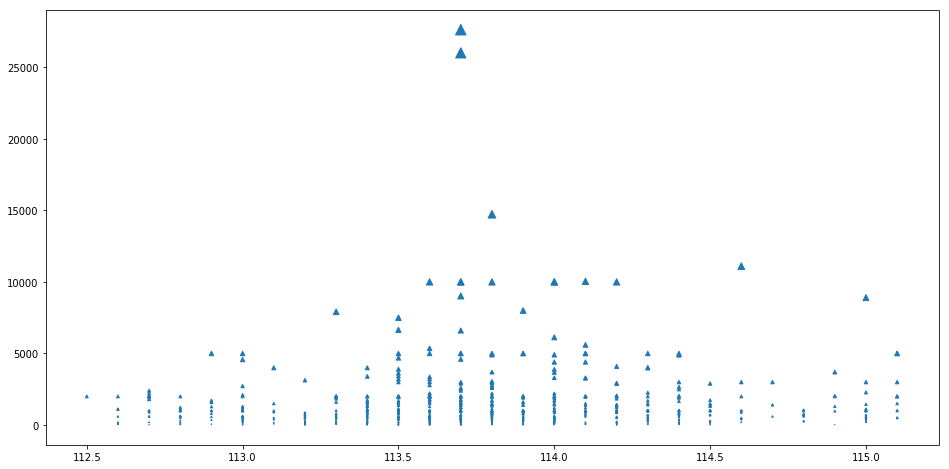

In [17]:
plt.figure(figsize=(16,8))
plt.scatter(Noki['Price'], Noki['Volume'], marker='^', s=Noki['Volume']/250)

### 3-D plots

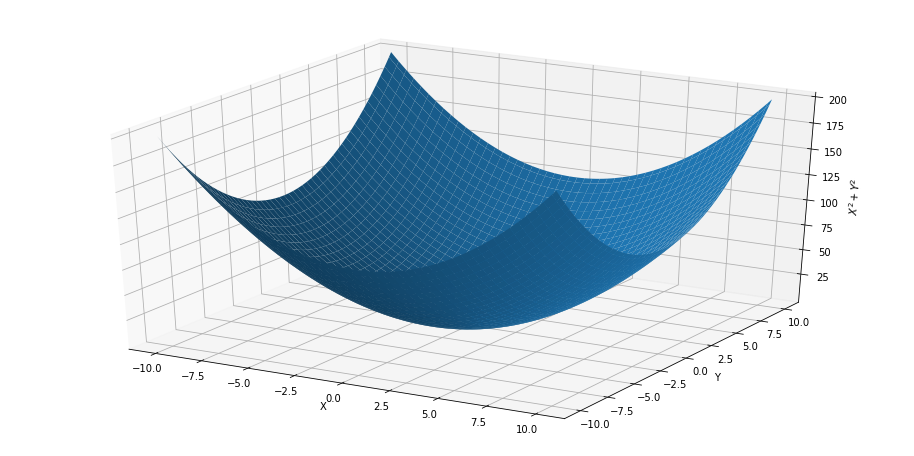

In [18]:
def func_3D(x,y):
    return x**2+y**2

from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(16,8))
ax=fig.gca(projection='3d')

xspace=np.linspace(-10,10, 100)
yspace=np.linspace(-10,10, 100)
func_3D(xspace, yspace)

xspace, yspace=np.meshgrid(xspace, yspace)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$X^2+Y^2$')

ax.plot_surface(xspace, yspace,func_3D(xspace, yspace))

In [19]:
Indices = pd.read_csv("data/hsbc_bcs_bac.csv")
hsbc=Indices[Indices['Index']=="HSBC"]

In [20]:
hsbc.head()

,date,open,high,low,close,volume,Index
0,2014-10-07,39.5520,39.6064,39.2099,39.2254,1259799,HSBC
1,2014-10-08,39.5908,39.9874,39.4742,39.9874,3777024,HSBC
2,2014-10-09,39.4820,39.5675,38.9922,39.0388,2568714,HSBC
3,2014-10-10,38.9066,38.9999,38.6501,38.6889,4375561,HSBC
4,2014-10-13,39.4820,39.6064,39.1943,39.2176,1782934,HSBC


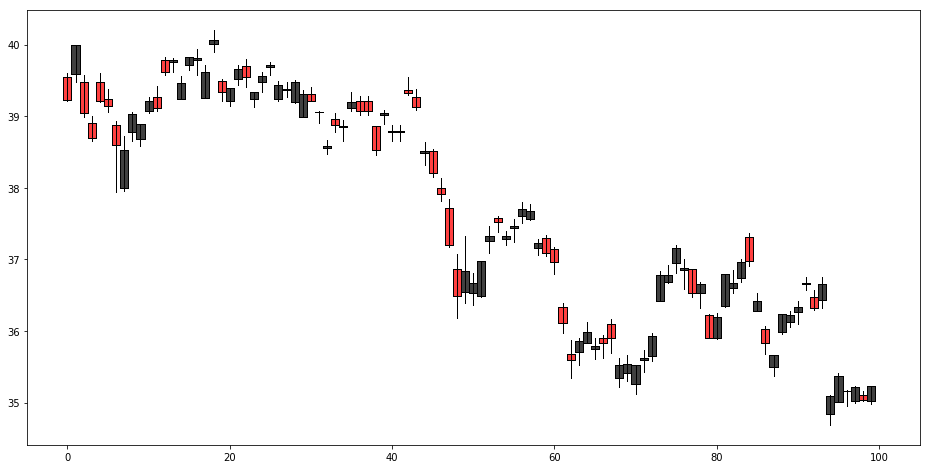

In [21]:
import matplotlib.finance as f
fig, ax = plt.subplots(figsize=(16,8))
hsbc=hsbc[0:100]
f.candlestick2_ochl(ax, hsbc['open'], hsbc['close'], hsbc['high'], hsbc['low'], width=1,alpha=0.75)